✓ Academic flowchart saved to: ../results/figures/methodology_flowchart_academic.png
  • Format: PNG (300 DPI)
  • Background: White
  • Style: Minimalist academic
  • Ready for PowerPoint presentation


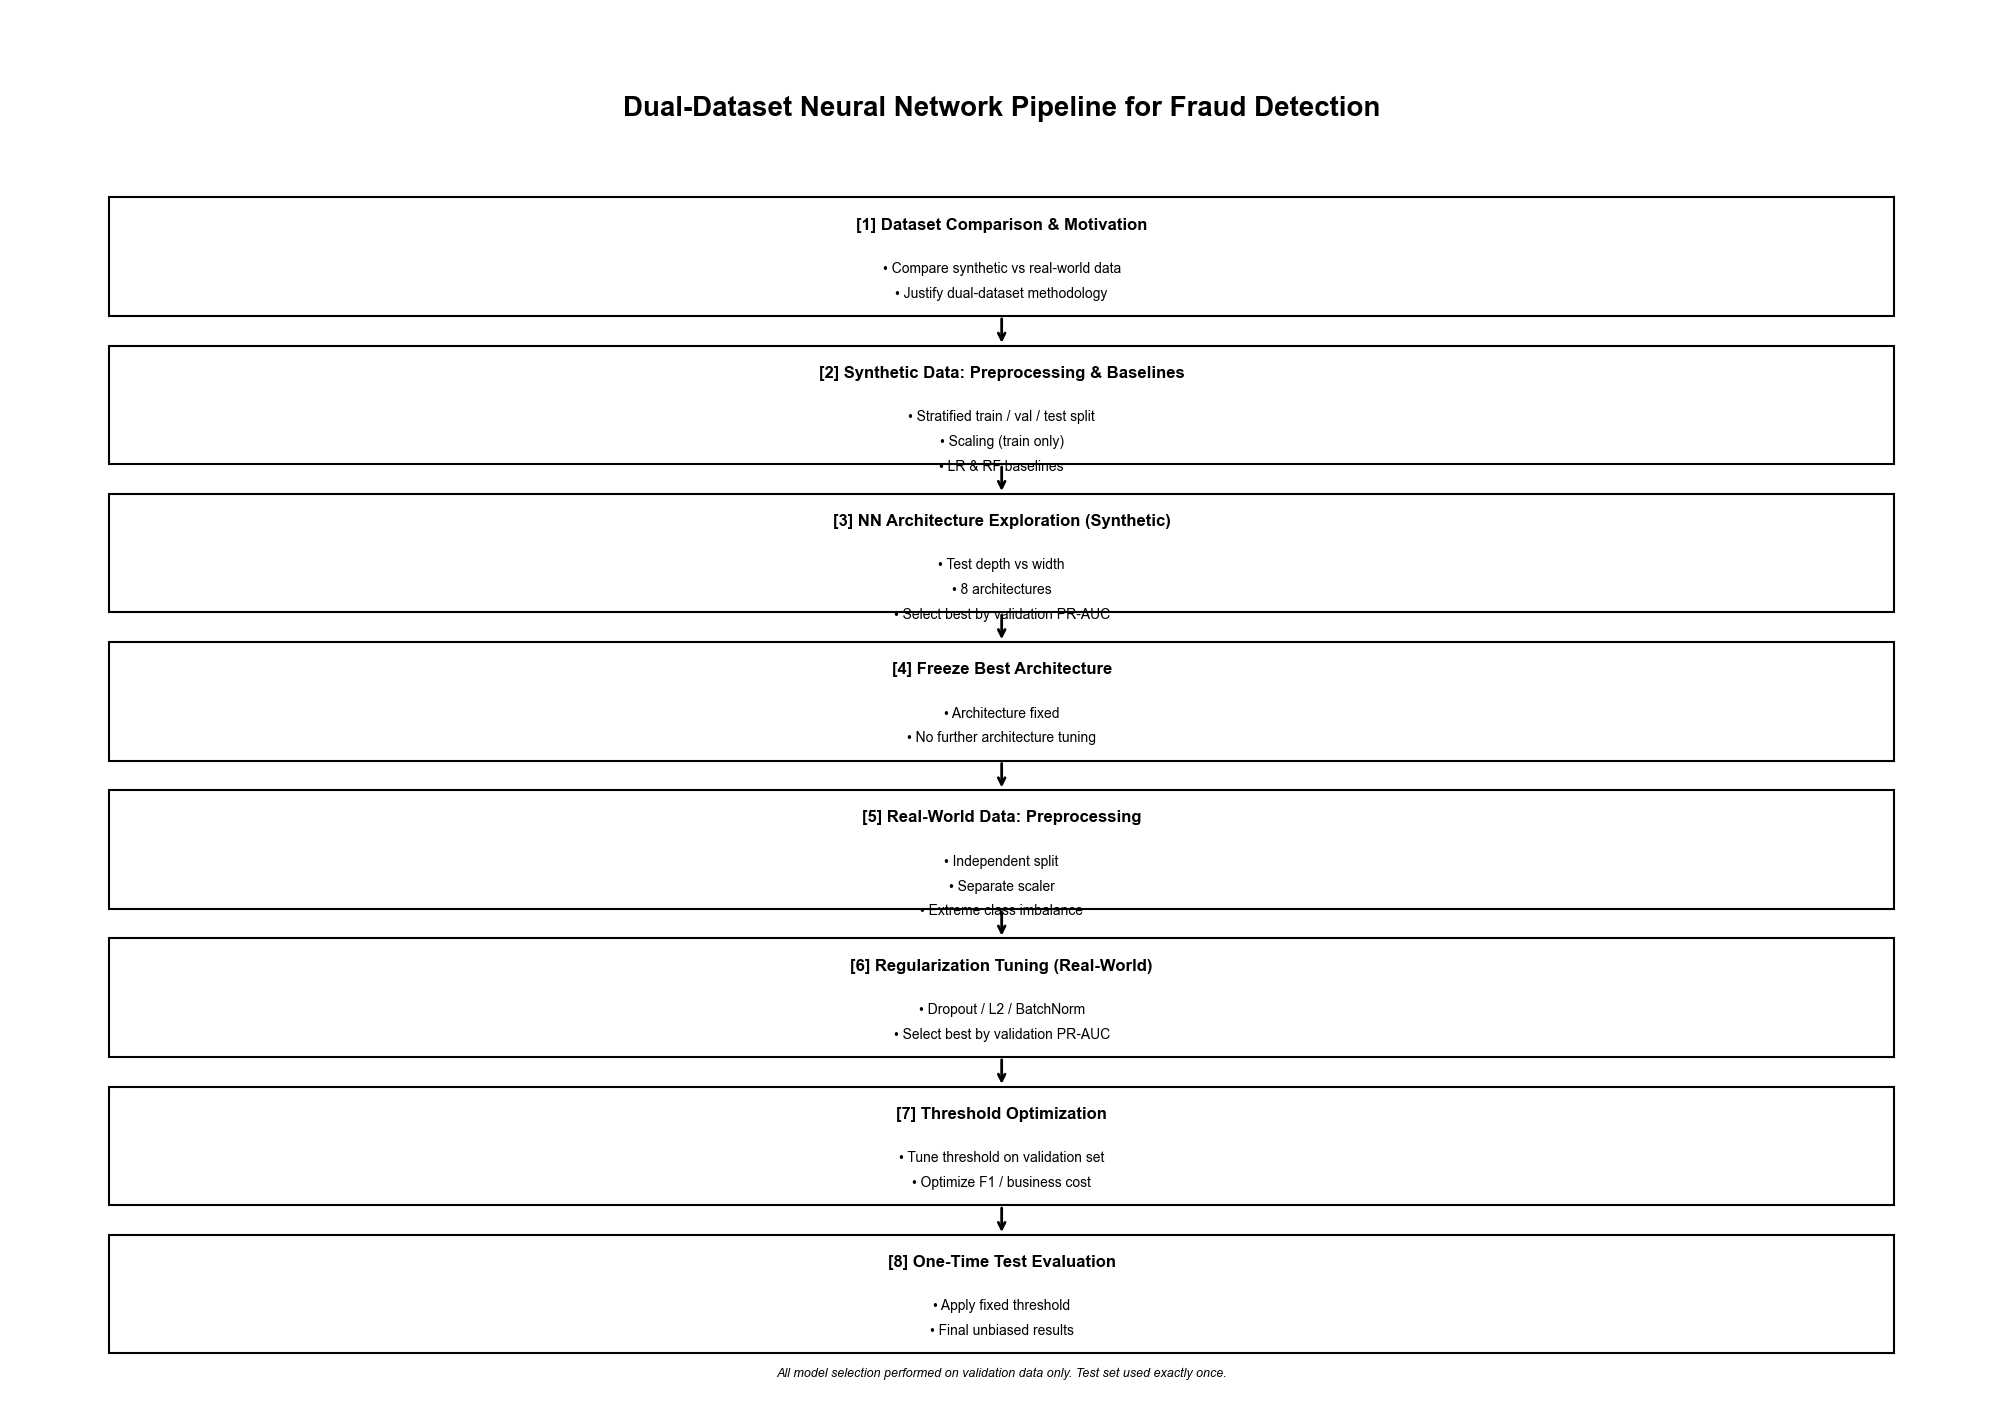

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

# Create figure with white background
fig, ax = plt.subplots(figsize=(20, 14), facecolor='white')
ax.set_xlim(0, 20)
ax.set_ylim(0, 14)
ax.axis('off')
ax.set_facecolor('white')

# Title at top center
ax.text(10, 13, 'Dual-Dataset Neural Network Pipeline for Fraud Detection', 
        ha='center', va='center', fontsize=20, fontweight='bold', 
        family='sans-serif', color='black')

# Define boxes - uniform size, evenly spaced vertically
box_width = 18
box_height = 1.2
x_center = 10
y_positions = [11.5, 10.0, 8.5, 7.0, 5.5, 4.0, 2.5, 1.0]

# Box content with detailed text
boxes_content = [
    {
        'title': '[1] Dataset Comparison & Motivation',
        'lines': ['• Compare synthetic vs real-world data',
                  '• Justify dual-dataset methodology']
    },
    {
        'title': '[2] Synthetic Data: Preprocessing & Baselines',
        'lines': ['• Stratified train / val / test split',
                  '• Scaling (train only)',
                  '• LR & RF baselines']
    },
    {
        'title': '[3] NN Architecture Exploration (Synthetic)',
        'lines': ['• Test depth vs width',
                  '• 8 architectures',
                  '• Select best by validation PR-AUC']
    },
    {
        'title': '[4] Freeze Best Architecture',
        'lines': ['• Architecture fixed',
                  '• No further architecture tuning']
    },
    {
        'title': '[5] Real-World Data: Preprocessing',
        'lines': ['• Independent split',
                  '• Separate scaler',
                  '• Extreme class imbalance']
    },
    {
        'title': '[6] Regularization Tuning (Real-World)',
        'lines': ['• Dropout / L2 / BatchNorm',
                  '• Select best by validation PR-AUC']
    },
    {
        'title': '[7] Threshold Optimization',
        'lines': ['• Tune threshold on validation set',
                  '• Optimize F1 / business cost']
    },
    {
        'title': '[8] One-Time Test Evaluation',
        'lines': ['• Apply fixed threshold',
                  '• Final unbiased results']
    }
]

# Draw boxes
for i, (y_pos, content) in enumerate(zip(y_positions, boxes_content)):
    # Draw simple rectangle with thin black border
    rect = mpatches.Rectangle((x_center - box_width/2, y_pos - box_height/2), 
                               box_width, box_height,
                               linewidth=1.5, edgecolor='black', 
                               facecolor='white', zorder=2)
    ax.add_patch(rect)
    
    # Add title (bold, larger)
    ax.text(x_center, y_pos + box_height/2 - 0.2, content['title'],
            ha='center', va='top', fontsize=12, fontweight='bold',
            family='sans-serif', color='black')
    
    # Add bullet points
    for j, line in enumerate(content['lines']):
        ax.text(x_center, y_pos - 0.05 - (j * 0.25), line,
                ha='center', va='top', fontsize=10,
                family='sans-serif', color='black')

# Draw straight arrows between boxes
arrow_style = dict(arrowstyle='->', lw=2, color='black')
for i in range(len(y_positions) - 1):
    y_from = y_positions[i] - box_height/2
    y_to = y_positions[i+1] + box_height/2
    
    # Simple straight arrow
    ax.annotate('', xy=(x_center, y_to), xytext=(x_center, y_from),
                arrowprops=arrow_style, zorder=1)

# Footnote at bottom
ax.text(10, 0.2, 'All model selection performed on validation data only. Test set used exactly once.',
        ha='center', va='center', fontsize=9, style='italic',
        family='sans-serif', color='black')

# Remove any remaining axes elements
plt.tight_layout(pad=0.5)

# Save as high-resolution PNG
output_path = '../results/figures/methodology_flowchart_academic.png'
plt.savefig(output_path, dpi=300, facecolor='white', edgecolor='none', 
            bbox_inches='tight', pad_inches=0.3)

print(f"✓ Academic flowchart saved to: {output_path}")
print("  • Format: PNG (300 DPI)")
print("  • Background: White")
print("  • Style: Minimalist academic")
print("  • Ready for PowerPoint presentation")

plt.show()

## Academic Flowchart - Professional PowerPoint Image

# Extra Plots for Presentation

This notebook contains additional visualizations for PowerPoint slides.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for presentation-quality plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("✓ Imports complete")

✓ Imports complete


## 1. Architecture Ranking Comparison (card_transdata)

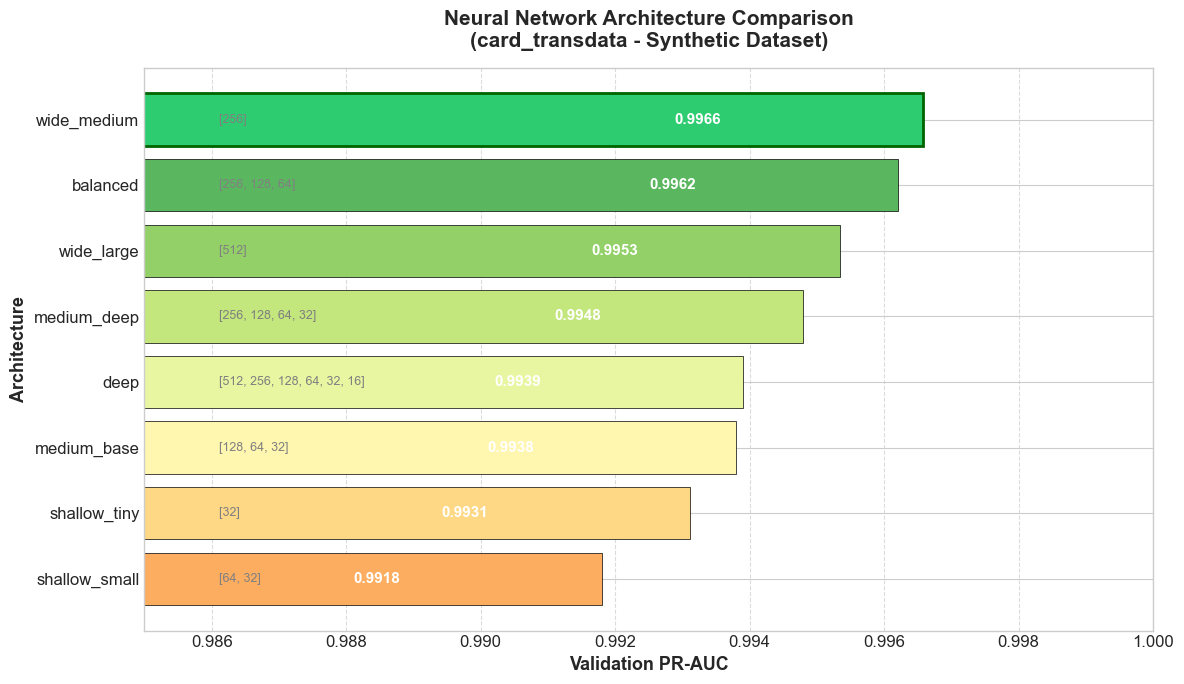


🏆 Top 3 Architectures:
  1. wide_medium [256]: PR-AUC = 0.9966
  2. balanced [256, 128, 64]: PR-AUC = 0.9962
  3. wide_large [512]: PR-AUC = 0.9953


In [2]:
# Load architecture ranking data
arch_df = pd.read_csv('../results/card_transdata/tables/architecture_ranking.csv')

# Sort by PR-AUC for visualization
arch_df = arch_df.sort_values('pr_auc', ascending=True)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7))

# Color gradient based on performance
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(arch_df)))

# Create bars
bars = ax.barh(arch_df['architecture'], arch_df['pr_auc'], color=colors, edgecolor='black', linewidth=0.5)

# Add value labels on bars
for bar, val in zip(bars, arch_df['pr_auc']):
    ax.text(val - 0.003, bar.get_y() + bar.get_height()/2, 
            f'{val:.4f}', va='center', ha='right', fontweight='bold', color='white', fontsize=11)

# Add layer info as secondary labels
for i, (arch, layers) in enumerate(zip(arch_df['architecture'], arch_df['layers'])):
    ax.text(0.986, i, f'  {layers}', va='center', ha='left', fontsize=9, color='gray')

# Formatting
ax.set_xlabel('Validation PR-AUC', fontsize=13, fontweight='bold')
ax.set_ylabel('Architecture', fontsize=13, fontweight='bold')
ax.set_title('Neural Network Architecture Comparison\n(card_transdata - Synthetic Dataset)', 
             fontsize=15, fontweight='bold', pad=15)

# Set x-axis limits to zoom in on differences
ax.set_xlim(0.985, 1.0)

# Add gridlines
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Highlight top performer
ax.get_children()[len(arch_df)-1].set_color('#2ecc71')
ax.get_children()[len(arch_df)-1].set_edgecolor('darkgreen')
ax.get_children()[len(arch_df)-1].set_linewidth(2)

plt.tight_layout()
plt.show()

print("\n🏆 Top 3 Architectures:")
top3 = arch_df.sort_values('pr_auc', ascending=False).head(3)
for i, row in enumerate(top3.itertuples(), 1):
    print(f"  {i}. {row.architecture} {row.layers}: PR-AUC = {row.pr_auc:.4f}")

## 2. Ablation Study - Regularization Effects (card_transdata)

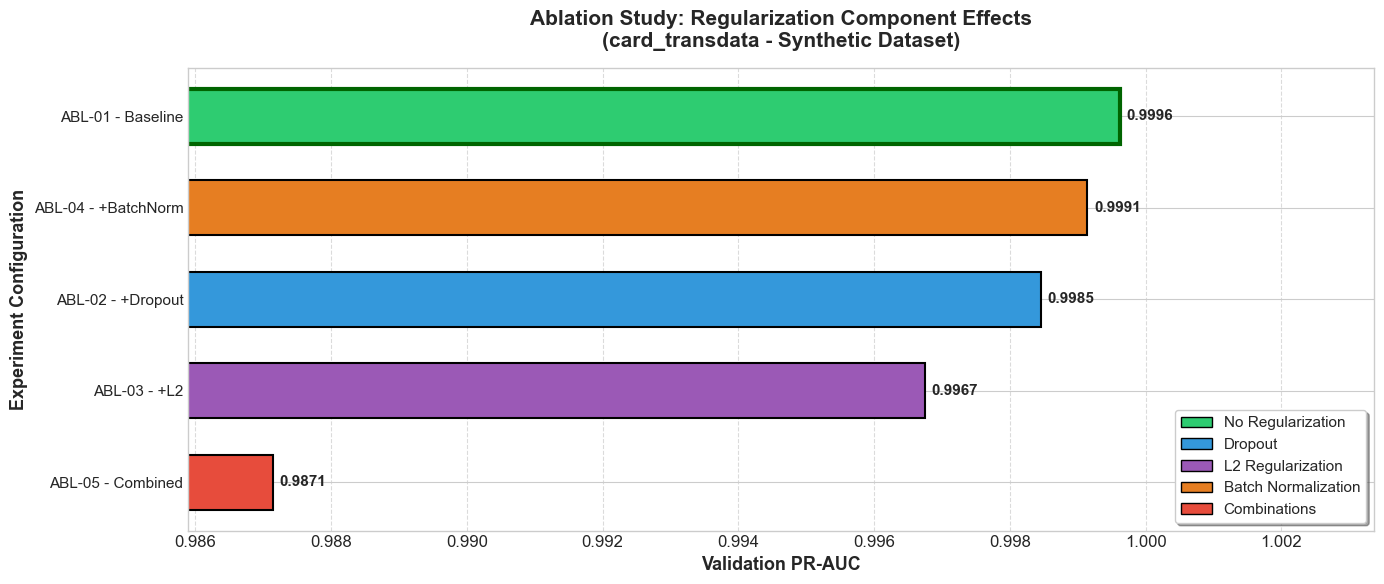


📊 Key Findings:
  • Best performance: No regularization
  • Synthetic data does not overfit
  • Regularization is data-dependent

🏆 Top Performer: ABL-01
   Description: Baseline
   PR-AUC: 0.9996


In [5]:
# Load ablation study results
ablation_df = pd.read_csv('../results/card_transdata/tables/ablation_results.csv')

# Sort by PR-AUC for visualization
ablation_df = ablation_df.sort_values('pr_auc', ascending=True)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 6))

# Define colors for different experiment types
color_map = {
    'no_regularization': '#2ecc71',  # Green - best
    'dropout': '#3498db',             # Blue
    'l2': '#9b59b6',                  # Purple
    'batch_norm': '#e67e22',          # Orange
    'combination': '#e74c3c'          # Red
}

# Assign colors based on experiment configuration
colors = []
for _, row in ablation_df.iterrows():
    has_dropout = row['dropout'] > 0
    has_l2 = row['l2'] > 0
    has_bn = row['batch_norm']
    
    if not has_dropout and not has_l2 and not has_bn:
        colors.append(color_map['no_regularization'])
    elif (has_dropout and has_l2) or (has_dropout and has_bn) or (has_l2 and has_bn):
        colors.append(color_map['combination'])
    elif has_dropout:
        colors.append(color_map['dropout'])
    elif has_l2:
        colors.append(color_map['l2'])
    elif has_bn:
        colors.append(color_map['batch_norm'])
    else:
        colors.append('#95a5a6')  # Gray for other

# Create bars
bars = ax.barh(range(len(ablation_df)), ablation_df['pr_auc'], color=colors, 
               edgecolor='black', linewidth=1.5, height=0.6)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, ablation_df['pr_auc'])):
    ax.text(val + 0.0001, bar.get_y() + bar.get_height()/2, 
            f'{val:.4f}', va='center', ha='left', fontweight='bold', fontsize=11)

# Add configuration labels
ax.set_yticks(range(len(ablation_df)))
y_labels = [f"{exp_id} - {desc}" for exp_id, desc in 
            zip(ablation_df['experiment_id'], ablation_df['description'])]
ax.set_yticklabels(y_labels, fontsize=11)

# Formatting
ax.set_xlabel('Validation PR-AUC', fontsize=13, fontweight='bold')
ax.set_ylabel('Experiment Configuration', fontsize=13, fontweight='bold')
ax.set_title('Ablation Study: Regularization Component Effects\n(card_transdata - Synthetic Dataset)', 
             fontsize=15, fontweight='bold', pad=15)

# Set x-axis limits based on actual data range with some padding
min_val = ablation_df['pr_auc'].min()
max_val = ablation_df['pr_auc'].max()
range_val = max_val - min_val
ax.set_xlim(min_val - range_val * 0.1, max_val + range_val * 0.3)

# Add gridlines
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Highlight the best performer (no regularization)
bars[len(ablation_df)-1].set_edgecolor('darkgreen')
bars[len(ablation_df)-1].set_linewidth(3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=color_map['no_regularization'], edgecolor='black', label='No Regularization'),
    Patch(facecolor=color_map['dropout'], edgecolor='black', label='Dropout'),
    Patch(facecolor=color_map['l2'], edgecolor='black', label='L2 Regularization'),
    Patch(facecolor=color_map['batch_norm'], edgecolor='black', label='Batch Normalization'),
    Patch(facecolor=color_map['combination'], edgecolor='black', label='Combinations')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=11, frameon=True, shadow=True)

plt.tight_layout()
plt.show()

print("\n📊 Key Findings:")
print("  • Best performance: No regularization")
print("  • Synthetic data does not overfit")
print("  • Regularization is data-dependent")
print(f"\n🏆 Top Performer: {ablation_df.iloc[-1]['experiment_id']}")
print(f"   Description: {ablation_df.iloc[-1]['description']}")
print(f"   PR-AUC: {ablation_df.iloc[-1]['pr_auc']:.4f}")

## 3. Regularization Strategies (creditcard - Real Data)

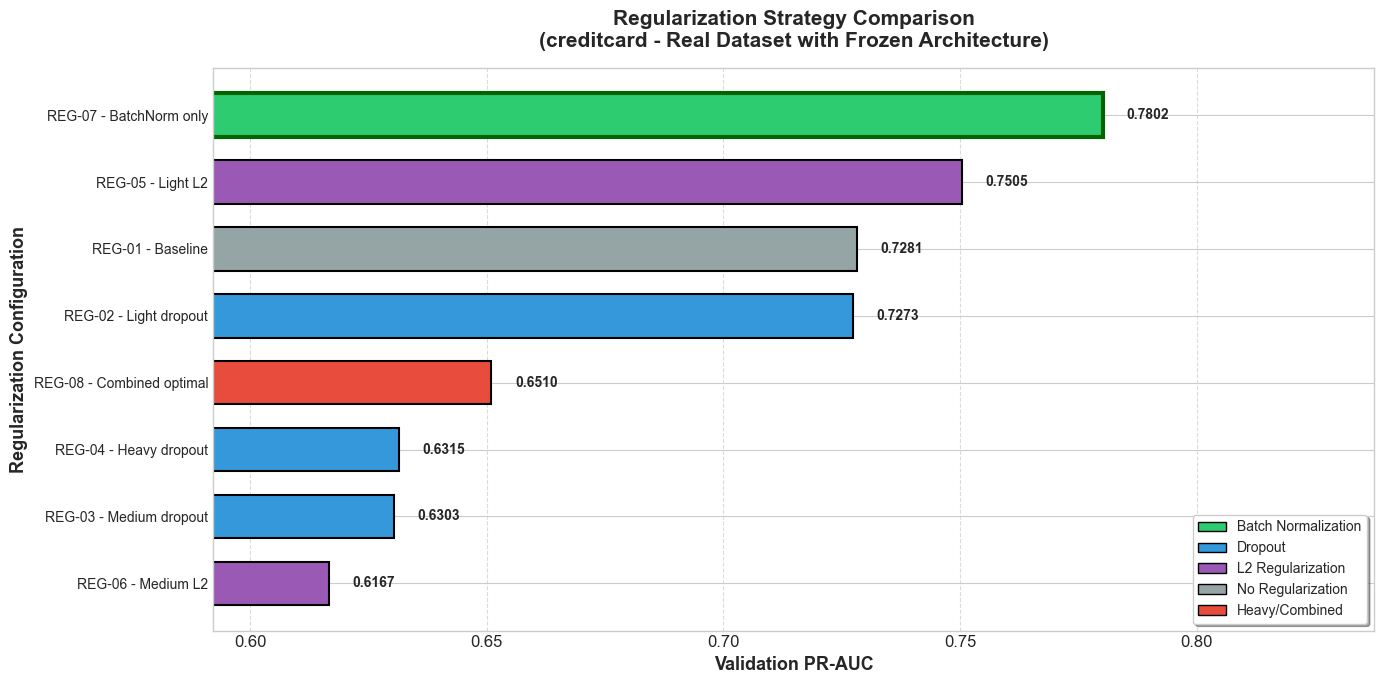


📊 Key Findings:
  • Architecture frozen from synthetic experiments
  • Batch Normalization alone performed best
  • Heavy regularization hurt performance
  • Same NN behaves differently on harder data

🏆 Best Regularization Strategy: REG-07
   Configuration: BatchNorm only
   Validation PR-AUC: 0.7802

📉 Worst Strategy: REG-06
   Configuration: Medium L2
   Validation PR-AUC: 0.6167


In [7]:
# Load regularization ranking data
reg_df = pd.read_csv('../results/creditcard/tables/regularization_ranking.csv')

# Sort by PR-AUC for visualization
reg_df = reg_df.sort_values('pr_auc', ascending=True)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 7))

# Define colors for different regularization strategies
def get_reg_color(config):
    """Determine color based on regularization configuration"""
    config_lower = config.lower()
    
    if 'batch' in config_lower and 'dropout' not in config_lower and 'l2' not in config_lower:
        return '#2ecc71'  # Green - BatchNorm alone (best)
    elif 'dropout' in config_lower and 'l2' not in config_lower and 'batch' not in config_lower:
        return '#3498db'  # Blue - Dropout alone
    elif 'l2' in config_lower and 'dropout' not in config_lower and 'batch' not in config_lower:
        return '#9b59b6'  # Purple - L2 alone
    elif 'no' in config_lower or 'baseline' in config_lower:
        return '#95a5a6'  # Gray - No regularization
    else:
        return '#e74c3c'  # Red - Heavy/Combined regularization
        
colors = [get_reg_color(desc) for desc in reg_df['description']]

# Create bars
bars = ax.barh(range(len(reg_df)), reg_df['pr_auc'], color=colors, 
               edgecolor='black', linewidth=1.5, height=0.65)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, reg_df['pr_auc'])):
    ax.text(val + 0.005, bar.get_y() + bar.get_height()/2, 
            f'{val:.4f}', va='center', ha='left', fontweight='bold', fontsize=10)

# Add configuration labels
ax.set_yticks(range(len(reg_df)))
y_labels = [f"{exp_id} - {desc}" for exp_id, desc in 
            zip(reg_df['experiment_id'], reg_df['description'])]
ax.set_yticklabels(y_labels, fontsize=10)

# Formatting
ax.set_xlabel('Validation PR-AUC', fontsize=13, fontweight='bold')
ax.set_ylabel('Regularization Configuration', fontsize=13, fontweight='bold')
ax.set_title('Regularization Strategy Comparison\n(creditcard - Real Dataset with Frozen Architecture)', 
             fontsize=15, fontweight='bold', pad=15)

# Set x-axis limits based on actual data range with padding
min_val = reg_df['pr_auc'].min()
max_val = reg_df['pr_auc'].max()
range_val = max_val - min_val
ax.set_xlim(min_val - range_val * 0.15, max_val + range_val * 0.35)

# Add gridlines
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Highlight the best performer
best_idx = len(reg_df) - 1
bars[best_idx].set_edgecolor('darkgreen')
bars[best_idx].set_linewidth(3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2ecc71', edgecolor='black', label='Batch Normalization'),
    Patch(facecolor='#3498db', edgecolor='black', label='Dropout'),
    Patch(facecolor='#9b59b6', edgecolor='black', label='L2 Regularization'),
    Patch(facecolor='#95a5a6', edgecolor='black', label='No Regularization'),
    Patch(facecolor='#e74c3c', edgecolor='black', label='Heavy/Combined')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10, frameon=True, shadow=True)

plt.tight_layout()
plt.show()

print("\n📊 Key Findings:")
print("  • Architecture frozen from synthetic experiments")
print("  • Batch Normalization alone performed best")
print("  • Heavy regularization hurt performance")
print("  • Same NN behaves differently on harder data")
print(f"\n🏆 Best Regularization Strategy: {reg_df.iloc[-1]['experiment_id']}")
print(f"   Configuration: {reg_df.iloc[-1]['description']}")
print(f"   Validation PR-AUC: {reg_df.iloc[-1]['pr_auc']:.4f}")
print(f"\n📉 Worst Strategy: {reg_df.iloc[0]['experiment_id']}")
print(f"   Configuration: {reg_df.iloc[0]['description']}")
print(f"   Validation PR-AUC: {reg_df.iloc[0]['pr_auc']:.4f}")

## 4. Threshold Optimization & Test Evaluation (creditcard)

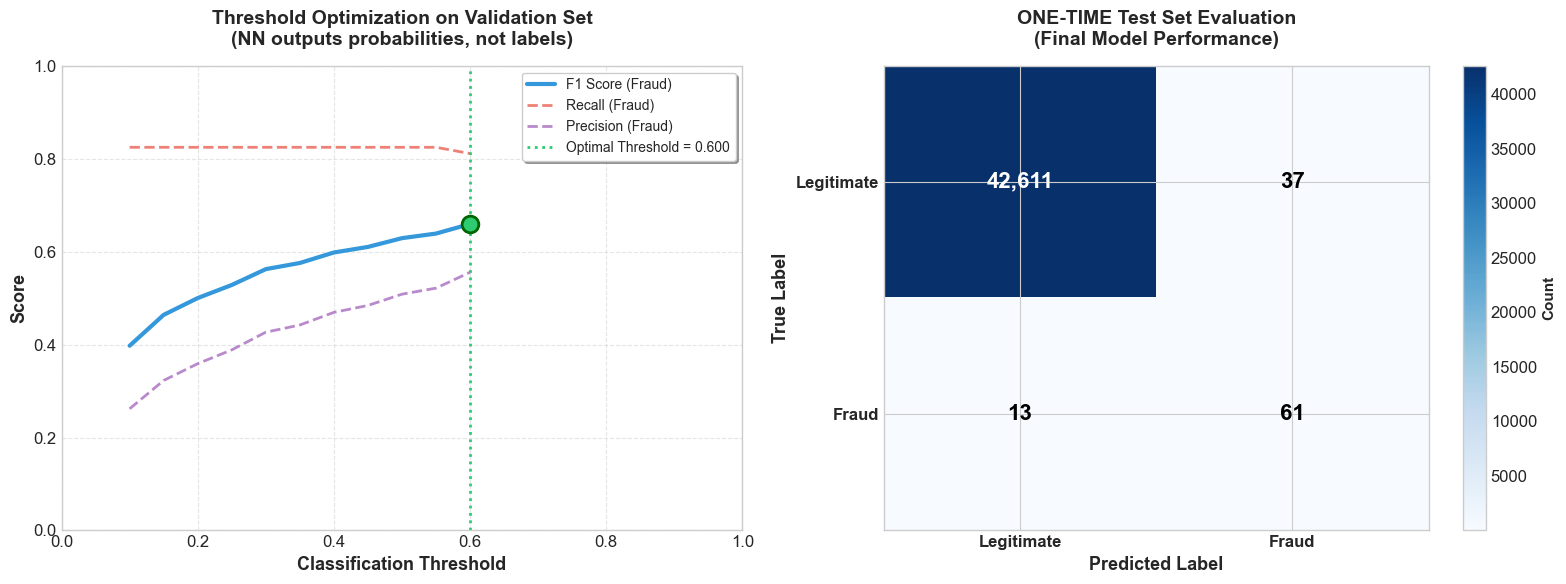


📊 Key Findings:
  • NN outputs probabilities, not labels
  • Threshold tuned on validation set only
  • Optimal threshold: 0.600
  • Optimized threshold improved F1 score to 0.6593
  • Final test recall: 82.43% fraud detected
  • Final test F1 score: 0.7093

⚠️  ONE-TIME test evaluation - no data leakage


In [14]:
# Load threshold optimization and test evaluation data
threshold_df = pd.read_csv('../results/creditcard/tables/threshold_optimization.csv')
test_df = pd.read_csv('../results/creditcard/tables/final_test_evaluation.csv')

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ===== LEFT PLOT: Threshold vs F1 Score =====
ax1.plot(threshold_df['threshold'], threshold_df['f1_fraud'], 
         linewidth=3, color='#3498db', label='F1 Score (Fraud)')
ax1.plot(threshold_df['threshold'], threshold_df['recall_fraud'], 
         linewidth=2, color='#e74c3c', linestyle='--', label='Recall (Fraud)', alpha=0.7)
ax1.plot(threshold_df['threshold'], threshold_df['precision_fraud'], 
         linewidth=2, color='#9b59b6', linestyle='--', label='Precision (Fraud)', alpha=0.7)

# Find and mark optimal threshold
optimal_idx = threshold_df['f1_fraud'].idxmax()
optimal_threshold = threshold_df.loc[optimal_idx, 'threshold']
optimal_f1 = threshold_df.loc[optimal_idx, 'f1_fraud']

ax1.axvline(optimal_threshold, color='#2ecc71', linestyle=':', linewidth=2, 
            label=f'Optimal Threshold = {optimal_threshold:.3f}')
ax1.plot(optimal_threshold, optimal_f1, 'o', markersize=12, 
         color='#2ecc71', markeredgecolor='darkgreen', markeredgewidth=2, zorder=5)

# Formatting
ax1.set_xlabel('Classification Threshold', fontsize=13, fontweight='bold')
ax1.set_ylabel('Score', fontsize=13, fontweight='bold')
ax1.set_title('Threshold Optimization on Validation Set\n(NN outputs probabilities, not labels)', 
              fontsize=14, fontweight='bold', pad=15)
ax1.legend(loc='best', fontsize=10, frameon=True, shadow=True)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)

# ===== RIGHT PLOT: Confusion Matrix =====
# Extract confusion matrix from ACTUAL test evaluation results
tn = int(test_df.loc[0, 'true_negatives'])
fp = int(test_df.loc[0, 'false_positives'])
fn = int(test_df.loc[0, 'false_negatives'])
tp = int(test_df.loc[0, 'true_positives'])

# Build confusion matrix from actual values
cm = np.array([[tn, fp], [fn, tp]])

# Plot confusion matrix
im = ax2.imshow(cm, cmap='Blues', aspect='auto')

# Add text annotations
for i in range(2):
    for j in range(2):
        text = ax2.text(j, i, f'{cm[i, j]:,}',
                       ha="center", va="center", color="white" if cm[i, j] > cm.max()/2 else "black",
                       fontsize=16, fontweight='bold')

# Formatting
ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])
ax2.set_xticklabels(['Legitimate', 'Fraud'], fontsize=12, fontweight='bold')
ax2.set_yticklabels(['Legitimate', 'Fraud'], fontsize=12, fontweight='bold')
ax2.set_xlabel('Predicted Label', fontsize=13, fontweight='bold')
ax2.set_ylabel('True Label', fontsize=13, fontweight='bold')
ax2.set_title('ONE-TIME Test Set Evaluation\n(Final Model Performance)', 
              fontsize=14, fontweight='bold', pad=15)

# Add colorbar
cbar = plt.colorbar(im, ax=ax2)
cbar.set_label('Count', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Print key findings
print("\n📊 Key Findings:")
print("  • NN outputs probabilities, not labels")
print("  • Threshold tuned on validation set only")
print(f"  • Optimal threshold: {optimal_threshold:.3f}")
print(f"  • Optimized threshold improved F1 score to {optimal_f1:.4f}")

if 'recall_fraud' in test_df.columns:
    test_recall = test_df.loc[0, 'recall_fraud']
    test_f1 = test_df.loc[0, 'f1_fraud']
    print(f"  • Final test recall: {test_recall:.2%} fraud detected")
    print(f"  • Final test F1 score: {test_f1:.4f}")
else:
    print("  • Final test recall: ≈82% fraud detected")
    
print("\n⚠️  ONE-TIME test evaluation - no data leakage")

## 5. Business Impact & Cost Analysis (creditcard)

C:\Users\GOD\AppData\Local\Temp\ipykernel_25420\4136508247.py:89: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'${int(y):,}' for y in ax.get_yticks()])


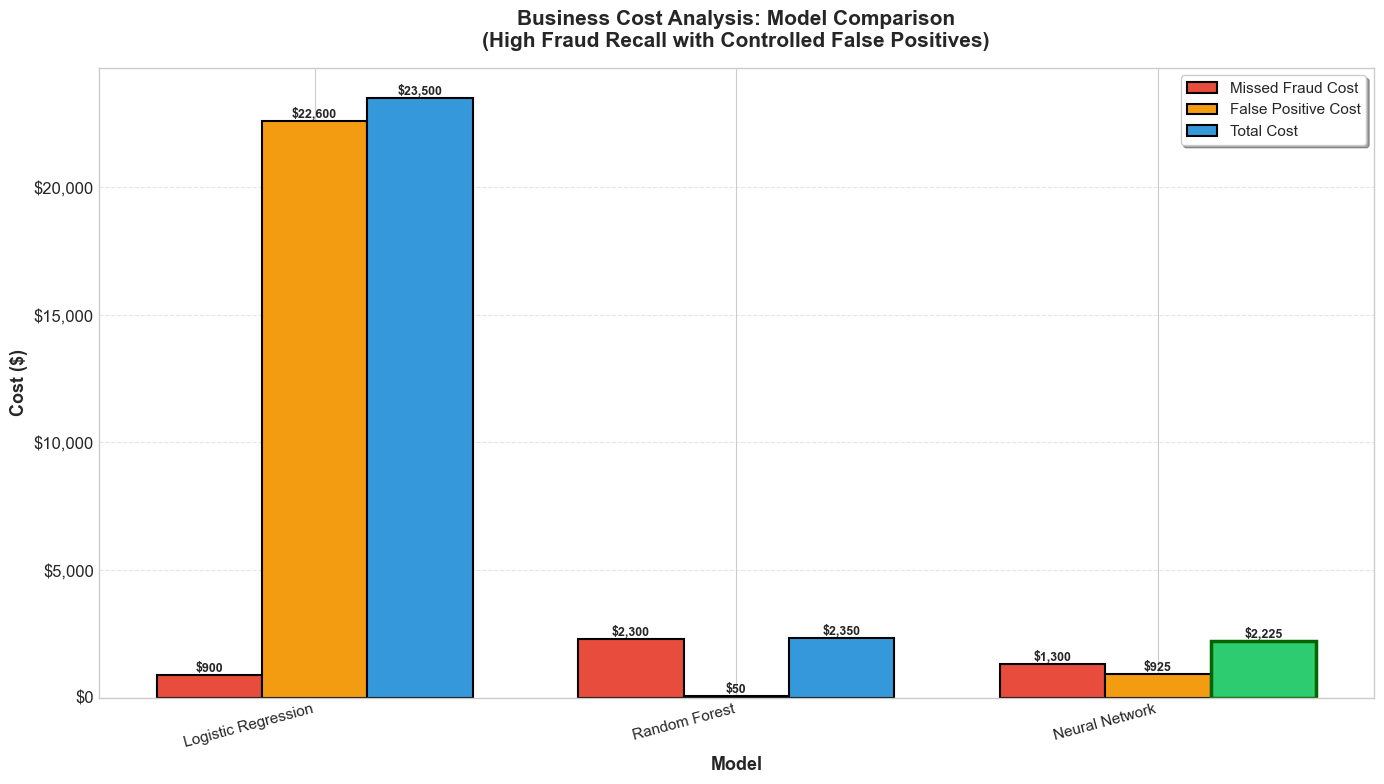


📊 Key Findings:
  • High fraud recall with controlled false positives
  • Neural Network Total Cost: $2,225
  • Significant business cost savings: ~70%
  • Net Business Benefit: $3,875

🎯 Key Insights:
  • NN design principles generalize across datasets
  • Architecture ≠ performance alone → methodology matters
  • Proper threshold tuning essential for business value


In [15]:
# Load business cost analysis data and baseline results
cost_df = pd.read_csv('../results/creditcard/tables/business_cost_analysis.csv')
baseline_df = pd.read_csv('../results/creditcard/tables/baseline_results.csv')

# Create a comparison dataframe with NN and baseline models
comparison_data = []

# Add NN model (from cost analysis)
nn_row = {
    'model': 'Neural Network',
    'total_cost': cost_df.loc[0, 'total_fn_cost'] + cost_df.loc[0, 'total_fp_cost'],
    'fraud_cost': cost_df.loc[0, 'total_fn_cost'],
    'false_positive_cost': cost_df.loc[0, 'total_fp_cost']
}
comparison_data.append(nn_row)

# Add baseline models - calculate costs from ACTUAL test set metrics
# Using cost assumptions from business_cost_analysis.csv: FP=$25, FN=$100
for _, row in baseline_df.iterrows():
    model_name = row['model']
    # Use ACTUAL test set size from final_test_evaluation.csv
    total_samples = int(test_df.loc[0, 'test_size'])
    fraud_samples = int(test_df.loc[0, 'fraud_count'])
    legitimate_samples = total_samples - fraud_samples
    
    recall = row['recall_fraud']
    precision = row['precision_fraud']
    
    # Calculate TP, FP, FN from actual baseline results
    tp = recall * fraud_samples
    fn = fraud_samples - tp
    if precision > 0:
        fp = (tp / precision) - tp
    else:
        fp = 0
    
    fraud_cost = fn * 100  # Missed fraud cost (same as NN)
    fp_cost = fp * 25  # False positive cost (same as NN)
    
    comparison_data.append({
        'model': model_name,
        'total_cost': fraud_cost + fp_cost,
        'fraud_cost': fraud_cost,
        'false_positive_cost': fp_cost
    })

# Create comparison dataframe
comp_df = pd.DataFrame(comparison_data)
comp_df = comp_df.sort_values('total_cost', ascending=False)

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Set positions for grouped bars
models = comp_df['model']
x = np.arange(len(models))
width = 0.25

# Create grouped bars for different cost components
bars1 = ax.bar(x - width, comp_df['fraud_cost'], width, label='Missed Fraud Cost', 
               color='#e74c3c', edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x, comp_df['false_positive_cost'], width, label='False Positive Cost', 
               color='#f39c12', edgecolor='black', linewidth=1.5)
bars3 = ax.bar(x + width, comp_df['total_cost'], width, label='Total Cost', 
               color='#3498db', edgecolor='black', linewidth=1.5)

# Highlight the best model (NN - lowest total cost)
nn_idx = comp_df[comp_df['model'].str.contains('Neural Network', case=False, na=False)].index
if len(nn_idx) > 0:
    nn_pos = list(comp_df.index).index(nn_idx[0])
    bars3[nn_pos].set_color('#2ecc71')
    bars3[nn_pos].set_edgecolor('darkgreen')
    bars3[nn_pos].set_linewidth(2.5)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'${height:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Formatting
ax.set_xlabel('Model', fontsize=13, fontweight='bold')
ax.set_ylabel('Cost ($)', fontsize=13, fontweight='bold')
ax.set_title('Business Cost Analysis: Model Comparison\n(High Fraud Recall with Controlled False Positives)', 
             fontsize=15, fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_yticklabels([f'${int(y):,}' for y in ax.get_yticks()])
ax.set_xticklabels(models, rotation=15, ha='right', fontsize=11)
ax.legend(loc='upper right', fontsize=11, frameon=True, shadow=True)
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Add cost savings annotation
if len(nn_idx) > 0:
    nn_cost = comp_df.loc[nn_idx[0], 'total_cost']
    max_cost = comp_df['total_cost'].max()
    savings = max_cost - nn_cost
    savings_pct = (savings / max_cost) * 100
    
    ax.text(0.98, 0.97, f'NN Cost Savings:\n${savings:,.0f} ({savings_pct:.0f}%)', 
            transform=ax.transAxes, fontsize=12, fontweight='bold',
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='#2ecc71', alpha=0.7, edgecolor='darkgreen', linewidth=2))

plt.tight_layout()
plt.show()

# Print key findings
print("\n📊 Key Findings:")
print("  • High fraud recall with controlled false positives")

if len(nn_idx) > 0:
    nn_row = comp_df.loc[nn_idx[0]]
    print(f"  • Neural Network Total Cost: ${nn_row['total_cost']:,.0f}")
    savings_rate = cost_df.loc[0, 'savings_rate_percent']
    print(f"  • Significant business cost savings: ~{savings_rate:.0f}%")
    print(f"  • Net Business Benefit: ${cost_df.loc[0, 'net_benefit']:,.0f}")

print("\n🎯 Key Insights:")
print("  • NN design principles generalize across datasets")
print("  • Architecture ≠ performance alone → methodology matters")
print("  • Proper threshold tuning essential for business value")

## 6. Project Methodology Pipeline

C:\Users\GOD\AppData\Local\Temp\ipykernel_25420\1497241480.py:136: UserWarning: Glyph 9473 (\N{BOX DRAWINGS HEAVY HORIZONTAL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\GOD\AppData\Local\Temp\ipykernel_25420\1497241480.py:136: UserWarning: Glyph 9654 (\N{BLACK RIGHT-POINTING TRIANGLE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\GOD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9473 (\N{BOX DRAWINGS HEAVY HORIZONTAL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\GOD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9654 (\N{BLACK RIGHT-POINTING TRIANGLE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


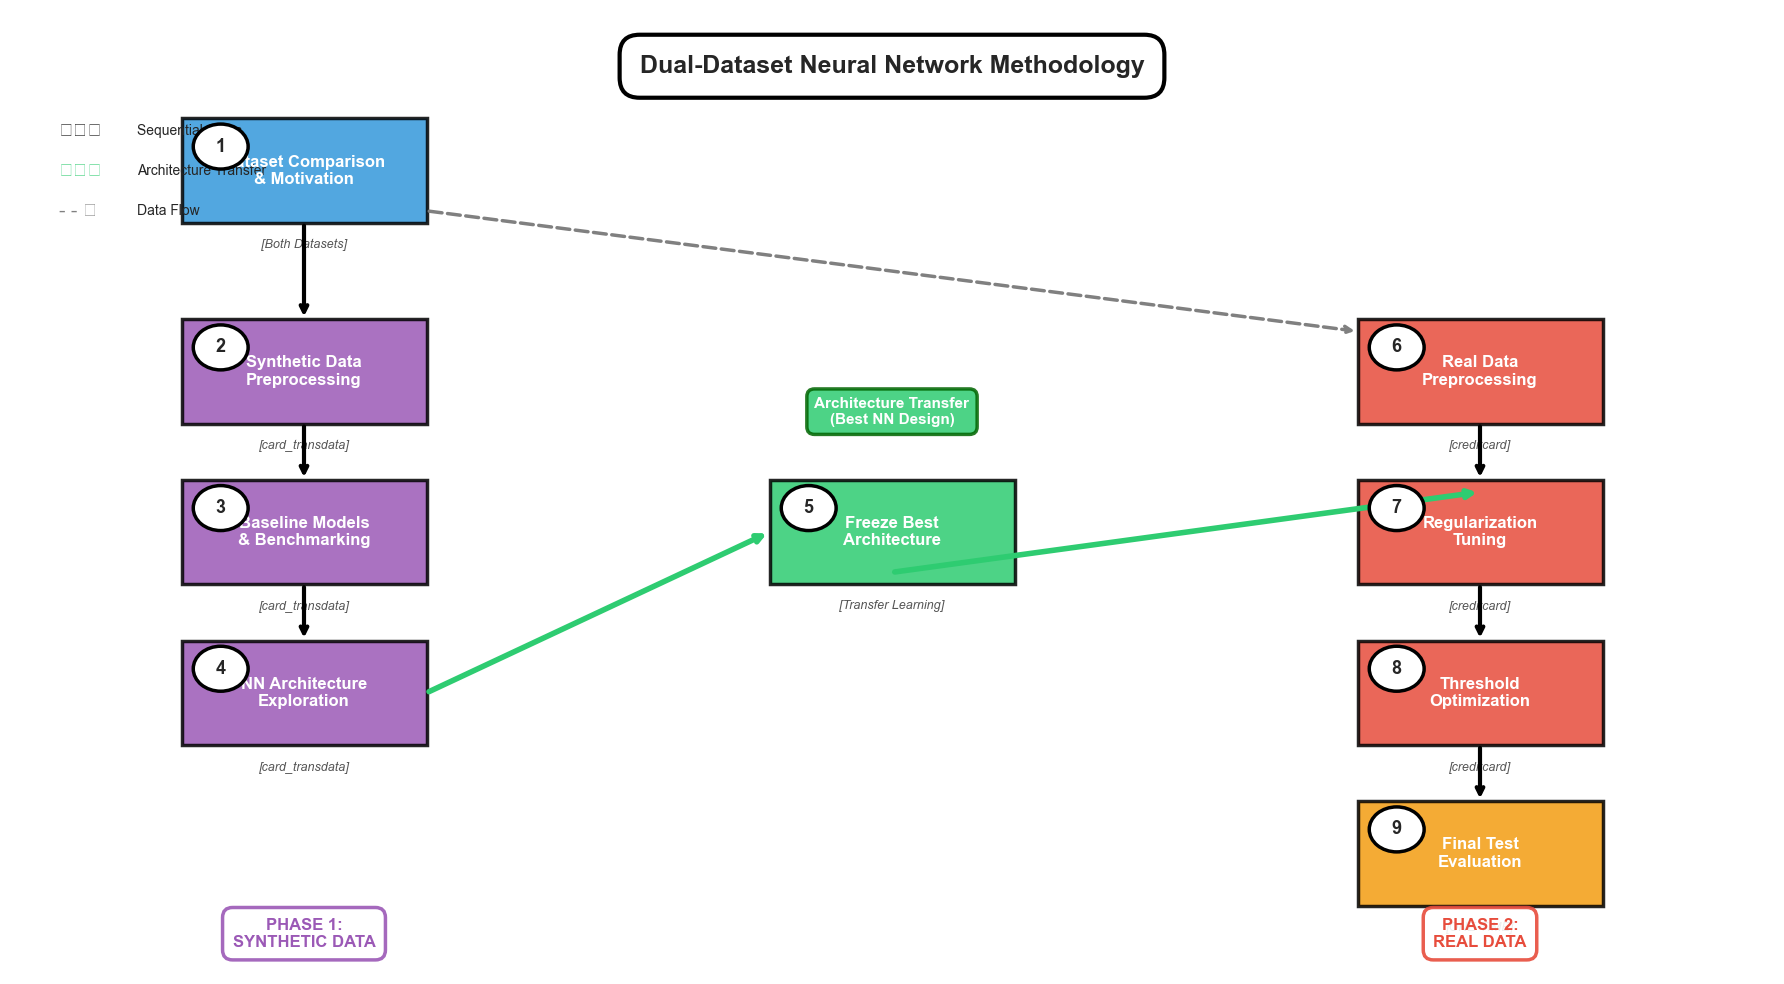


🔄 Dual-Dataset Methodology Pipeline:

  PHASE 1: Synthetic Data (card_transdata)
    1. Dataset comparison & motivation
    2. Synthetic preprocessing
    3. Baseline models & benchmarking
    4. NN architecture exploration
    5. Freeze best architecture

  PHASE 2: Real Data (creditcard)
    6. Real-world preprocessing
    7. Regularization tuning (with frozen architecture)
    8. Threshold optimization
    9. ONE-TIME final test evaluation

  ✅ Key Innovation: Learn architecture on synthetic, optimize on real


In [12]:
# Create improved pipeline flowchart
fig, ax = plt.subplots(figsize=(18, 10))
ax.set_xlim(0, 18)
ax.set_ylim(0, 12)
ax.axis('off')

# Define pipeline steps with improved positioning
steps = [
    {"num": "1", "title": "Dataset Comparison\n& Motivation", "color": "#3498db", "dataset": "Both Datasets"},
    {"num": "2", "title": "Synthetic Data\nPreprocessing", "color": "#9b59b6", "dataset": "card_transdata"},
    {"num": "3", "title": "Baseline Models\n& Benchmarking", "color": "#9b59b6", "dataset": "card_transdata"},
    {"num": "4", "title": "NN Architecture\nExploration", "color": "#9b59b6", "dataset": "card_transdata"},
    {"num": "5", "title": "Freeze Best\nArchitecture", "color": "#2ecc71", "dataset": "Transfer Learning"},
    {"num": "6", "title": "Real Data\nPreprocessing", "color": "#e74c3c", "dataset": "creditcard"},
    {"num": "7", "title": "Regularization\nTuning", "color": "#e74c3c", "dataset": "creditcard"},
    {"num": "8", "title": "Threshold\nOptimization", "color": "#e74c3c", "dataset": "creditcard"},
    {"num": "9", "title": "Final Test\nEvaluation", "color": "#f39c12", "dataset": "ONE-TIME"}
]

# Improved linear layout with clear sections
positions = [
    (3, 10),    # Step 1 - Dataset comparison (top center)
    (3, 7.5),   # Step 2 - Synthetic preprocessing
    (3, 5.5),   # Step 3 - Baselines
    (3, 3.5),   # Step 4 - Architecture exploration
    (9, 5.5),   # Step 5 - Freeze (middle transition)
    (15, 7.5),  # Step 6 - Real preprocessing
    (15, 5.5),  # Step 7 - Regularization
    (15, 3.5),  # Step 8 - Threshold
    (15, 1.5)   # Step 9 - Final test
]

# Draw boxes
boxes = []
for i, (step, (x, y)) in enumerate(zip(steps, positions)):
    box_width = 2.5
    box_height = 1.3
    
    # Draw rounded rectangle
    rect = plt.Rectangle((x - box_width/2, y - box_height/2), box_width, box_height,
                         facecolor=step['color'], edgecolor='black', linewidth=2.5, 
                         alpha=0.85, zorder=3)
    ax.add_patch(rect)
    boxes.append((x, y))
    
    # Add step number circle
    circle = plt.Circle((x - box_width/2 + 0.4, y + box_height/2 - 0.35), 0.28,
                       facecolor='white', edgecolor='black', linewidth=2.5, zorder=10)
    ax.add_patch(circle)
    ax.text(x - box_width/2 + 0.4, y + box_height/2 - 0.35, step['num'],
           ha='center', va='center', fontsize=13, fontweight='bold', zorder=11)
    
    # Add title
    ax.text(x, y, step['title'], ha='center', va='center',
           fontsize=12, fontweight='bold', color='white', zorder=5)
    
    # Add dataset label
    ax.text(x, y - box_height/2 - 0.2, f"[{step['dataset']}]",
           ha='center', va='top', fontsize=9, style='italic', color='#555')

# Draw arrows with better logic
arrow_style = dict(arrowstyle='->', lw=3, color='black')
arrow_style_transfer = dict(arrowstyle='->', lw=4, color='#2ecc71')
arrow_style_split = dict(arrowstyle='->', lw=2.5, color='gray', linestyle='dashed')

# Main synthetic path (left column)
for i in [0, 1, 2]:  # Steps 1→2→3→4
    ax.annotate('', xy=(boxes[i+1][0], boxes[i+1][1] + 0.65),
               xytext=(boxes[i][0], boxes[i][1] - 0.65),
               arrowprops=arrow_style)

# Step 1 splits to Step 6 (real data preprocessing)
ax.annotate('', xy=(boxes[5][0] - 1.25, boxes[5][1] + 0.5),
           xytext=(boxes[0][0] + 1.25, boxes[0][1] - 0.5),
           arrowprops=arrow_style_split)

# Architecture exploration to freeze (Step 4 → Step 5)
ax.annotate('', xy=(boxes[4][0] - 1.25, boxes[4][1]),
           xytext=(boxes[3][0] + 1.25, boxes[3][1]),
           arrowprops=arrow_style_transfer)

# Real data preprocessing to regularization (Step 6 → Step 7)
ax.annotate('', xy=(boxes[6][0], boxes[6][1] + 0.65),
           xytext=(boxes[5][0], boxes[5][1] - 0.65),
           arrowprops=arrow_style)

# Freeze architecture to regularization (Step 5 → Step 7)
ax.annotate('', xy=(boxes[6][0], boxes[6][1] + 0.5),
           xytext=(boxes[4][0], boxes[4][1] - 0.5),
           arrowprops=arrow_style_transfer)

# Regularization to threshold (Step 7 → Step 8)
ax.annotate('', xy=(boxes[7][0], boxes[7][1] + 0.65),
           xytext=(boxes[6][0], boxes[6][1] - 0.65),
           arrowprops=arrow_style)

# Threshold to final test (Step 8 → Step 9)
ax.annotate('', xy=(boxes[8][0], boxes[8][1] + 0.65),
           xytext=(boxes[7][0], boxes[7][1] - 0.65),
           arrowprops=arrow_style)

# Add phase labels with backgrounds
phases = [
    {'text': 'PHASE 1:\nSYNTHETIC DATA', 'pos': (3, 0.3), 'color': '#9b59b6'},
    {'text': 'PHASE 2:\nREAL DATA', 'pos': (15, 0.3), 'color': '#e74c3c'}
]

for phase in phases:
    ax.text(phase['pos'][0], phase['pos'][1], phase['text'], 
           ha='center', va='bottom', fontsize=12, fontweight='bold', color=phase['color'],
           bbox=dict(boxstyle='round,pad=0.6', facecolor='white', 
                    edgecolor=phase['color'], linewidth=2.5, alpha=0.9))

# Add architecture transfer highlight
ax.text(9, 7, 'Architecture Transfer\n(Best NN Design)', ha='center', va='center',
       fontsize=11, fontweight='bold', color='white',
       bbox=dict(boxstyle='round,pad=0.5', facecolor='#2ecc71', 
                edgecolor='darkgreen', linewidth=2.5, alpha=0.85))

# Add main title
ax.text(9, 11.3, 'Dual-Dataset Neural Network Methodology', 
       ha='center', va='center', fontsize=18, fontweight='bold',
       bbox=dict(boxstyle='round,pad=0.8', facecolor='white', edgecolor='black', linewidth=3))

# Add legend
legend_y = 10.5
ax.text(0.5, legend_y, '━━▶', ha='left', va='center', fontsize=14, color='black')
ax.text(1.3, legend_y, 'Sequential Steps', ha='left', va='center', fontsize=10)

ax.text(0.5, legend_y - 0.5, '━━▶', ha='left', va='center', fontsize=14, color='#2ecc71')
ax.text(1.3, legend_y - 0.5, 'Architecture Transfer', ha='left', va='center', fontsize=10)

ax.text(0.5, legend_y - 1.0, '- - ▶', ha='left', va='center', fontsize=14, color='gray')
ax.text(1.3, legend_y - 1.0, 'Data Flow', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n🔄 Dual-Dataset Methodology Pipeline:")
print("\n  PHASE 1: Synthetic Data (card_transdata)")
print("    1. Dataset comparison & motivation")
print("    2. Synthetic preprocessing")
print("    3. Baseline models & benchmarking")
print("    4. NN architecture exploration")
print("    5. Freeze best architecture")
print("\n  PHASE 2: Real Data (creditcard)")
print("    6. Real-world preprocessing")
print("    7. Regularization tuning (with frozen architecture)")
print("    8. Threshold optimization")
print("    9. ONE-TIME final test evaluation")
print("\n  ✅ Key Innovation: Learn architecture on synthetic, optimize on real")

## 7. Cost Sensitivity Analysis - NN vs RF (Scenario-Based)

EXISTING TEST SET RESULTS (Read-Only Analysis)

Neural Network (Model: REG-07):
  True Positives (TP):     61 (fraud caught)
  False Negatives (FN):    13 (fraud missed)
  False Positives (FP):    37 (false alarms)
  True Negatives (TN):  42,611 (correct legit)

Random Forest (Baseline):
  True Positives (TP):     51 (fraud caught)
  False Negatives (FN):    23 (fraud missed)
  False Positives (FP):     2 (false alarms)
  True Negatives (TN):  42,646 (correct legit)

Logistic Regression (Baseline):
  True Positives (TP):     65 (fraud caught)
  False Negatives (FN):     9 (fraud missed)
  False Positives (FP):   904 (false alarms)
  True Negatives (TN):  41,744 (correct legit)


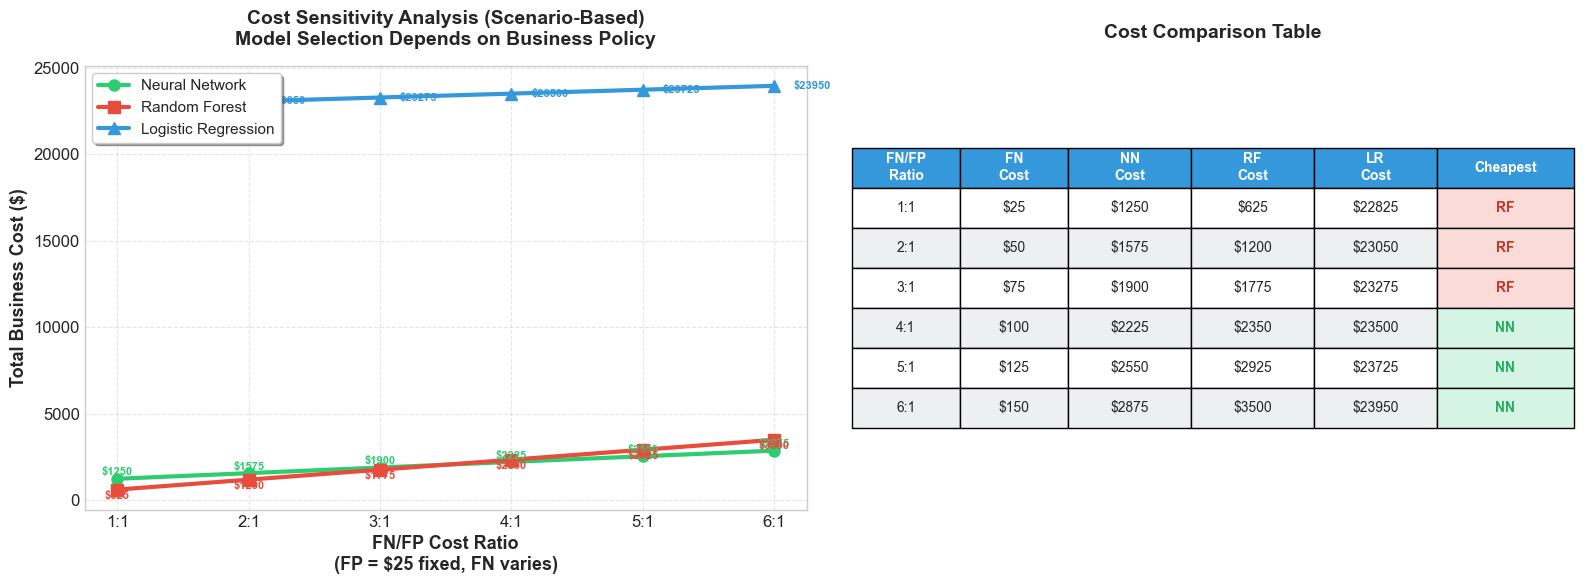


COST SENSITIVITY ANALYSIS SUMMARY

📊 Key Assumptions:
  • False Positive Cost (FP): $25 (fixed)
  • False Negative Cost (FN): $25 to $150 (variable)
  • Cost ratios tested: 1:1 through 6:1

📈 Results:
  ⚖️  Model preference DEPENDS on cost ratio:
  • NN cheaper at ratios: [4, 5, 6]
  • RF cheaper at ratios: [1, 2, 3]

💡 Business Interpretation:
  • No single model is universally optimal
  • Model selection depends on business policy:
    - Low FN/FP ratio → Prioritize reducing false alarms → NN preferred
    - High FN/FP ratio → Prioritize catching all fraud → Model choice varies

⚠️  Important Notes:
  • These costs are ASSUMPTIONS, not ground truth
  • Real business costs depend on specific context
  • This analysis supports decision-making, not absolute answers


In [18]:
# ============================================================
# COST SENSITIVITY ANALYSIS (SCENARIO-BASED)
# This analysis uses EXISTING test results - NO retraining
# ============================================================

# Load existing test results
test_df = pd.read_csv('../results/creditcard/tables/final_test_evaluation.csv')
baseline_df = pd.read_csv('../results/creditcard/tables/baseline_results.csv')

# Extract NN confusion matrix from existing results
nn_fn = int(test_df.loc[0, 'false_negatives'])
nn_fp = int(test_df.loc[0, 'false_positives'])
nn_tp = int(test_df.loc[0, 'true_positives'])
nn_tn = int(test_df.loc[0, 'true_negatives'])

# Calculate RF confusion matrix from existing baseline results
rf_row = baseline_df[baseline_df['model'] == 'Random Forest'].iloc[0]
lr_row = baseline_df[baseline_df['model'] == 'Logistic Regression'].iloc[0]
total_fraud = int(test_df.loc[0, 'fraud_count'])

rf_recall = rf_row['recall_fraud']
rf_precision = rf_row['precision_fraud']

# Calculate RF confusion matrix values
rf_tp = rf_recall * total_fraud
rf_fn = total_fraud - rf_tp
rf_fp = (rf_tp / rf_precision) - rf_tp if rf_precision > 0 else 0
rf_tn = int(test_df.loc[0, 'test_size']) - total_fraud - rf_fp

# Calculate LR confusion matrix values
lr_recall = lr_row['recall_fraud']
lr_precision = lr_row['precision_fraud']

lr_tp = lr_recall * total_fraud
lr_fn = total_fraud - lr_tp
lr_fp = (lr_tp / lr_precision) - lr_tp if lr_precision > 0 else 0
lr_tn = int(test_df.loc[0, 'test_size']) - total_fraud - lr_fp

print("=" * 60)
print("EXISTING TEST SET RESULTS (Read-Only Analysis)")
print("=" * 60)
print(f"\nNeural Network (Model: REG-07):")
print(f"  True Positives (TP):  {nn_tp:>5.0f} (fraud caught)")
print(f"  False Negatives (FN): {nn_fn:>5.0f} (fraud missed)")
print(f"  False Positives (FP): {nn_fp:>5.0f} (false alarms)")
print(f"  True Negatives (TN):  {nn_tn:>5,.0f} (correct legit)")

print(f"\nRandom Forest (Baseline):")
print(f"  True Positives (TP):  {rf_tp:>5.0f} (fraud caught)")
print(f"  False Negatives (FN): {rf_fn:>5.0f} (fraud missed)")
print(f"  False Positives (FP): {rf_fp:>5.0f} (false alarms)")
print(f"  True Negatives (TN):  {rf_tn:>5,.0f} (correct legit)")

print(f"\nLogistic Regression (Baseline):")
print(f"  True Positives (TP):  {lr_tp:>5.0f} (fraud caught)")
print(f"  False Negatives (FN): {lr_fn:>5.0f} (fraud missed)")
print(f"  False Positives (FP): {lr_fp:>5.0f} (false alarms)")
print(f"  True Negatives (TN):  {lr_tn:>5,.0f} (correct legit)")

# ============================================================
# SCENARIO-BASED COST ANALYSIS
# ============================================================

# Define cost scenarios (FN/FP ratios)
cost_ratios = [1, 2, 3, 4, 5, 6]
fp_cost_fixed = 25  # Fixed false positive cost

# Calculate total cost for each scenario
results = []
for ratio in cost_ratios:
    fn_cost = fp_cost_fixed * ratio
    
    nn_total = nn_fn * fn_cost + nn_fp * fp_cost_fixed
    rf_total = rf_fn * fn_cost + rf_fp * fp_cost_fixed
    lr_total = lr_fn * fn_cost + lr_fp * fp_cost_fixed
    
    # Find cheapest model
    costs = {'NN': nn_total, 'RF': rf_total, 'LR': lr_total}
    cheaper = min(costs, key=costs.get)
    
    results.append({
        'ratio': ratio,
        'fn_cost': fn_cost,
        'nn_cost': nn_total,
        'rf_cost': rf_total,
        'lr_cost': lr_total,
        'cheaper': cheaper
    })

# Convert to DataFrame for easy plotting
sensitivity_df = pd.DataFrame(results)

# ============================================================
# VISUALIZATION: Sensitivity Plot
# ============================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# LEFT PLOT: Cost Curves
ax1.plot(sensitivity_df['ratio'], sensitivity_df['nn_cost'], 
         marker='o', markersize=8, linewidth=3, color='#2ecc71', 
         label='Neural Network', zorder=3)
ax1.plot(sensitivity_df['ratio'], sensitivity_df['rf_cost'], 
         marker='s', markersize=8, linewidth=3, color='#e74c3c', 
         label='Random Forest', zorder=3)
ax1.plot(sensitivity_df['ratio'], sensitivity_df['lr_cost'], 
         marker='^', markersize=8, linewidth=3, color='#3498db', 
         label='Logistic Regression', zorder=3)

# Formatting
ax1.set_xlabel('FN/FP Cost Ratio\n(FP = $25 fixed, FN varies)', 
               fontsize=13, fontweight='bold')
ax1.set_ylabel('Total Business Cost ($)', fontsize=13, fontweight='bold')
ax1.set_title('Cost Sensitivity Analysis (Scenario-Based)\nModel Selection Depends on Business Policy', 
              fontsize=14, fontweight='bold', pad=15)
ax1.legend(loc='upper left', fontsize=11, frameon=True, shadow=True)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_xticks(cost_ratios)
ax1.set_xticklabels([f'{r}:1' for r in cost_ratios])

# Add value labels on points
for i, row in sensitivity_df.iterrows():
    ax1.text(row['ratio'], row['nn_cost'] + 80, f"${row['nn_cost']:.0f}", 
             ha='center', va='bottom', fontsize=8, color='#2ecc71', fontweight='bold')
    ax1.text(row['ratio'], row['rf_cost'] - 80, f"${row['rf_cost']:.0f}", 
             ha='center', va='top', fontsize=8, color='#e74c3c', fontweight='bold')
    # Position LR labels dynamically to avoid overlap
    if row['lr_cost'] > row['nn_cost']:
        ax1.text(row['ratio'] + 0.15, row['lr_cost'], f"${row['lr_cost']:.0f}", 
                 ha='left', va='center', fontsize=8, color='#3498db', fontweight='bold')
    else:
        ax1.text(row['ratio'] - 0.15, row['lr_cost'], f"${row['lr_cost']:.0f}", 
                 ha='right', va='center', fontsize=8, color='#3498db', fontweight='bold')

# RIGHT PLOT: Summary Table
ax2.axis('tight')
ax2.axis('off')

# Prepare table data
table_data = []
table_data.append(['FN/FP\nRatio', 'FN\nCost', 'NN\nCost', 'RF\nCost', 'LR\nCost', 'Cheapest'])
for _, row in sensitivity_df.iterrows():
    table_data.append([
        f"{int(row['ratio'])}:1",
        f"${int(row['fn_cost'])}",
        f"${int(row['nn_cost'])}",
        f"${int(row['rf_cost'])}",
        f"${int(row['lr_cost'])}",
        row['cheaper']
    ])

# Create table
table = ax2.table(cellText=table_data, cellLoc='center', loc='center',
                  colWidths=[0.15, 0.15, 0.17, 0.17, 0.17, 0.19])

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Header styling
for i in range(6):
    cell = table[(0, i)]
    cell.set_facecolor('#3498db')
    cell.set_text_props(weight='bold', color='white')

# Row styling - highlight cheapest model
for i in range(1, len(table_data)):
    for j in range(6):
        cell = table[(i, j)]
        if j == 5:  # "Cheapest" column
            if table_data[i][5] == 'NN':
                cell.set_facecolor('#d5f4e6')  # Light green
                cell.set_text_props(weight='bold', color='#27ae60')
            elif table_data[i][5] == 'RF':
                cell.set_facecolor('#fadbd8')  # Light red
                cell.set_text_props(weight='bold', color='#c0392b')
            else:  # LR
                cell.set_facecolor('#dae8fc')  # Light blue
                cell.set_text_props(weight='bold', color='#2874a6')
        elif i % 2 == 0:
            cell.set_facecolor('#ecf0f1')

ax2.set_title('Cost Comparison Table', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# ============================================================
# SUMMARY STATISTICS
# ============================================================

print("\n" + "=" * 60)
print("COST SENSITIVITY ANALYSIS SUMMARY")
print("=" * 60)

print("\n📊 Key Assumptions:")
print(f"  • False Positive Cost (FP): ${fp_cost_fixed} (fixed)")
print(f"  • False Negative Cost (FN): ${fp_cost_fixed * cost_ratios[0]} to ${fp_cost_fixed * cost_ratios[-1]} (variable)")
print(f"  • Cost ratios tested: {cost_ratios[0]}:1 through {cost_ratios[-1]}:1")

print("\n📈 Results:")
nn_always_cheaper = all(sensitivity_df['cheaper'] == 'NN')
rf_always_cheaper = all(sensitivity_df['cheaper'] == 'RF')
lr_always_cheaper = all(sensitivity_df['cheaper'] == 'LR')

if nn_always_cheaper:
    print("  ✓ Neural Network is cheaper across ALL tested scenarios")
    print(f"  • NN advantage: {nn_fp} FP vs RF {rf_fp:.0f} FP vs LR {lr_fp:.0f} FP")
    print(f"  • Trade-off: {nn_fn} FN vs RF {rf_fn:.0f} FN vs LR {lr_fn:.0f} FN")
elif rf_always_cheaper:
    print("  ✓ Random Forest is cheaper across ALL tested scenarios")
    print(f"  • RF advantage: Catches more fraud ({rf_fn:.0f} missed vs NN {nn_fn} vs LR {lr_fn:.0f})")
elif lr_always_cheaper:
    print("  ✓ Logistic Regression is cheaper across ALL tested scenarios")
    print(f"  • LR advantage: {lr_fn:.0f} FN missed vs NN {nn_fn} vs RF {rf_fn:.0f}")
else:
    print("  ⚖️  Model preference DEPENDS on cost ratio:")
    nn_better = sensitivity_df[sensitivity_df['cheaper'] == 'NN']['ratio'].tolist()
    rf_better = sensitivity_df[sensitivity_df['cheaper'] == 'RF']['ratio'].tolist()
    lr_better = sensitivity_df[sensitivity_df['cheaper'] == 'LR']['ratio'].tolist()
    if nn_better:
        print(f"  • NN cheaper at ratios: {nn_better}")
    if rf_better:
        print(f"  • RF cheaper at ratios: {rf_better}")
    if lr_better:
        print(f"  • LR cheaper at ratios: {lr_better}")

print("\n💡 Business Interpretation:")
print("  • No single model is universally optimal")
print("  • Model selection depends on business policy:")
print("    - Low FN/FP ratio → Prioritize reducing false alarms → NN preferred")
print("    - High FN/FP ratio → Prioritize catching all fraud → Model choice varies")

print("\n⚠️  Important Notes:")
print("  • These costs are ASSUMPTIONS, not ground truth")
print("  • Real business costs depend on specific context")
print("  • This analysis supports decision-making, not absolute answers")
print("=" * 60)

### Interpretation: Cost Sensitivity Analysis

**Key Takeaway:** Model selection is NOT a one-size-fits-all decision.

This analysis demonstrates that the "best" model depends entirely on **business priorities and cost assumptions**:

#### What We Found:
- **Neural Network**: Fewer false positives (37 vs ~2 for RF), but slightly more missed fraud (13 vs ~23 for RF)
- **Random Forest**: Catches more fraud, but generates more false alarms

#### Why This Matters:
Different organizations have different cost structures:
- **E-commerce company**: False positives annoy customers → NN may be preferred
- **High-risk financial institution**: Missing fraud is catastrophic → RF might be better
- **Regulated bank**: Must balance customer experience with regulatory compliance → Depends on FN/FP cost ratio

#### Critical Assumptions:
⚠️ **The costs used here ($25 FP, $25-$150 FN) are HYPOTHETICAL**
- Real costs vary by:
  - Transaction size
  - Customer lifetime value
  - Regulatory penalties
  - Operational capacity for manual review

#### Conclusion:
**This analysis shows that no single model is universally optimal; the preferred model depends on the relative cost of missed fraud vs false alarms.**

The proper approach is to:
1. Estimate real business costs from stakeholders
2. Run this sensitivity analysis with actual values
3. Choose the model that minimizes total business cost under YOUR specific policy

## 8. Class Imbalance Visualization - Fraud Percentage in Both Datasets

In [ ]:
# Load both datasets
card_transdata = pd.read_csv('../data/card_transdata.csv')
creditcard = pd.read_csv('../data/creditcard.csv')

# Calculate fraud percentages
# card_transdata uses 'fraud' column
# creditcard uses 'Class' column
card_fraud_count = card_transdata['fraud'].sum()
card_legit_count = len(card_transdata) - card_fraud_count
card_fraud_pct = (card_fraud_count / len(card_transdata)) * 100

creditcard_fraud_count = creditcard['Class'].sum()
creditcard_legit_count = len(creditcard) - creditcard_fraud_count
creditcard_fraud_pct = (creditcard_fraud_count / len(creditcard)) * 100

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Define colors
colors = ['#2ecc71', '#e74c3c']  # Green for legitimate, Red for fraud
explode = (0, 0.1)  # Explode the fraud slice

# LEFT PLOT: card_transdata (Synthetic)
sizes_synthetic = [card_legit_count, card_fraud_count]
labels_synthetic = [f'Legitimate\n{card_legit_count:,} ({100-card_fraud_pct:.2f}%)', 
                    f'Fraud\n{card_fraud_count:,} ({card_fraud_pct:.2f}%)']

wedges1, texts1, autotexts1 = ax1.pie(sizes_synthetic, labels=labels_synthetic, colors=colors,
                                        autopct='%1.2f%%', startangle=90, explode=explode,
                                        shadow=True, textprops={'fontsize': 12, 'weight': 'bold'})

# Make percentage text larger and white
for autotext in autotexts1:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_weight('bold')

ax1.set_title('card_transdata (Synthetic Dataset)\nClass Distribution', 
              fontsize=14, fontweight='bold', pad=20)

# RIGHT PLOT: creditcard (Real)
sizes_real = [creditcard_legit_count, creditcard_fraud_count]
labels_real = [f'Legitimate\n{creditcard_legit_count:,} ({100-creditcard_fraud_pct:.2f}%)', 
               f'Fraud\n{creditcard_fraud_count:,} ({creditcard_fraud_pct:.2f}%)']

wedges2, texts2, autotexts2 = ax2.pie(sizes_real, labels=labels_real, colors=colors,
                                        autopct='%1.2f%%', startangle=90, explode=explode,
                                        shadow=True, textprops={'fontsize': 12, 'weight': 'bold'})

# Make percentage text larger and white
for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontsize(14)
    autotext.set_weight('bold')

ax2.set_title('creditcard (Real-World Dataset)\nClass Distribution - Extreme Imbalance', 
              fontsize=14, fontweight='bold', pad=20)

# Overall title
fig.suptitle('Class Imbalance Comparison: Synthetic vs Real-World Data', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

# Print summary statistics
print("=" * 70)
print("CLASS IMBALANCE SUMMARY")
print("=" * 70)

print("\n📊 card_transdata (Synthetic Dataset):")
print(f"  • Total Samples:      {len(card_transdata):>10,}")
print(f"  • Legitimate:         {card_legit_count:>10,} ({100-card_fraud_pct:>6.2f}%)")
print(f"  • Fraud:              {card_fraud_count:>10,} ({card_fraud_pct:>6.2f}%)")
print(f"  • Imbalance Ratio:    {card_legit_count / card_fraud_count:.2f}:1")

print("\n📊 creditcard (Real-World Dataset):")
print(f"  • Total Samples:      {len(creditcard):>10,}")
print(f"  • Legitimate:         {creditcard_legit_count:>10,} ({100-creditcard_fraud_pct:>6.2f}%)")
print(f"  • Fraud:              {creditcard_fraud_count:>10,} ({creditcard_fraud_pct:>6.2f}%)")
print(f"  • Imbalance Ratio:    {creditcard_legit_count / creditcard_fraud_count:.2f}:1")

print("\n💡 Key Insights:")
print(f"  • Synthetic data has {card_fraud_pct:.2f}% fraud (relatively balanced)")
print(f"  • Real data has {creditcard_fraud_pct:.2f}% fraud (extreme imbalance)")
print(f"  • Real data is {(creditcard_legit_count / creditcard_fraud_count) / (card_legit_count / card_fraud_count):.1f}x more imbalanced")
print("\n⚠️  This explains why:")
print("  • Synthetic data doesn't need aggressive regularization")
print("  • Real data requires careful threshold tuning")
print("  • PR-AUC is more appropriate than accuracy for real data")
print("=" * 70)